In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train = tf.expand_dims(X_train, -1)
X_test = tf.expand_dims(X_test, -1)

In [ ]:
import numpy as np

In [ ]:
noise = np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = X_train + noise

In [ ]:
noise = np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
X_test_noisy = X_test + noise

(-0.5, 27.5, 27.5, -0.5)

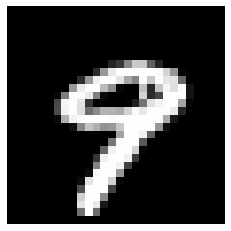

In [ ]:
plt.imshow(tf.squeeze(X_test[9]), cmap='gray')
plt.axis('off')    

In [ ]:
input_shape = X_train.shape[1:]
input_shape

TensorShape([28, 28, 1])

In [ ]:
inputs = Input(input_shape)
x = Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(x)
x = Flatten()(x)
code = Dense(units=16)(x)

encoder = Model(inputs, code, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                25104     
                                                                 
Total params: 29,904
Trainable params: 29,904
Non-trainable params: 0
_________________________________________________________________


In [ ]:
latent_inputs = Input((16,))
x = Dense(units=1568)(latent_inputs)
x = Reshape((7, 7, 32))(x)
x = Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation='relu')(x)
outputs = Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='same', activation='relu')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_1 (Dense)             (None, 1568)              26656     
                                                                 
 reshape (Reshape)           (None, 7, 7, 32)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       4624      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 31,425
Trainable params: 31,425
Non-trainable

In [ ]:
autoencoder = Model(inputs, decoder(encoder(inputs)))
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                29904     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         31425     
                                                                 
Total params: 61,329
Trainable params: 61,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(X_train_noisy, X_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0194
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0174
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0169
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0165
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0163
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0161
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0160
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0159
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0159
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0158


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
X_pred = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
X_pred.shape

(10000, 28, 28, 1)

In [ ]:
codes = encoder.predict(X_test)
codes.shape

313/313 [==============================] - 0s 1ms/step


(10000, 16)

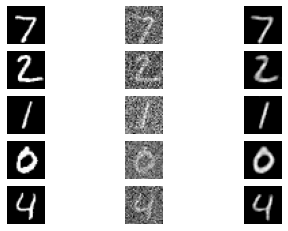

In [ ]:
for i in range(5):
    plt.subplot(5,3,i*3 + 1)
    plt.imshow(tf.squeeze(X_test[i]), cmap='gray')
    plt.axis('off')
    plt.subplot(5,3,i*3+2)
    plt.imshow(tf.squeeze(X_test_noisy[i]), cmap='gray')
    plt.axis('off')
    plt.subplot(5,3,i*3+3)
    plt.imshow(tf.squeeze(X_pred[i]), cmap='gray')
    plt.axis('off')